In [1]:
import ROOT as R
from ROOT import RooFit as RF
R.gROOT.SetBatch(True)

Welcome to JupyROOT 6.28/00


-0.003712198342521733
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Amass) TTree Float_t branch Amass will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #137 because Amass cannot accommodate the value 48.695
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #156 because Amass cannot accommodate the value 48.2909
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #570 because Amass cannot accommodate the value 48.4722
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #613 because Amass cannot accommodate the value 44.3351
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(Amass) Ignored 534 out-of-range events
[#1] INFO:Minimization --

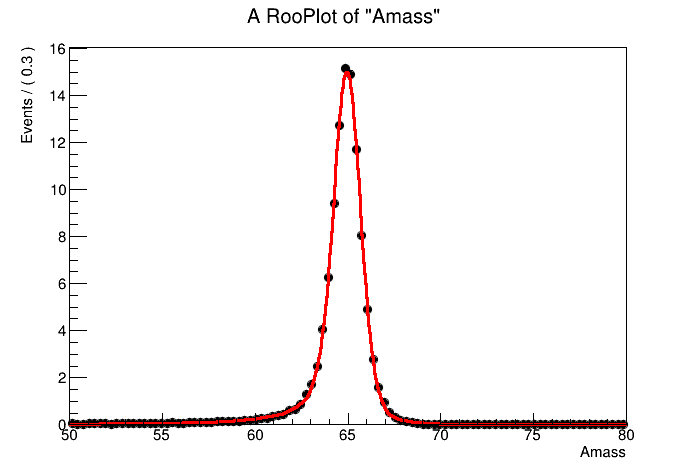

In [3]:
f = R.TFile("MHc-70_MA-65/MHc-70_MA-65.root")
tree = f.Get("Events")

# Define mass and weight variables
mass = R.RooRealVar("Amass", "Amass", 65, 50, 80)
weight = R.RooRealVar("weight", "weight", 0, -1., 1.)

# Convert to RooDataSet
mc = R.RooDataSet("Amass", "Amass", tree, R.RooArgSet(mass, weight), "", "weight") 

# Define the parameters of the DCB function
mean = R.RooRealVar("mean", "mean", 65, 60, 70)
sigma = R.RooRealVar("sigma", "sigma", 2, 0, 5)
alpha1 = R.RooRealVar("alpha1", "alpha1", 1., 0.1, 10.)
n1 = R.RooRealVar("n1", "n1", 1., 0.1, 10.)
alpha2 = R.RooRealVar("alpha2", "alpha2", -1., -10., -0.1)
n2 = R.RooRealVar("n2", "n2", 1., 0.1, 10.)

# Build double crystall ball function
CB1 = R.RooCBShape("CB1", "CB1", mass, mean, sigma, alpha1, n1)
CB2 = R.RooCBShape("CB2", "CB2", mass, mean, sigma, alpha2, n2)
coeff = R.RooRealVar("coeff", "coeff", 0.5, 0., 1.)
model = R.RooAddPdf("DCB", "DCB", R.RooArgList(CB1, CB2), R.RooArgList(coeff))
result = model.fitTo(mc, RF.SumW2Error(True), RF.Save(True), RF.PrintLevel(-1))

ndof = mc.numEntries() - result.floatParsFinal().getSize()

can = R.TCanvas()
plot = mass.frame()
mc.plotOn(plot)
model.plotOn(plot, R.RooFit.LineColor(2))
chi2 = plot.chiSquare(ndof)
plot.Draw()
can.Update()
can.Draw()

print(chi2)

-0.0022623576962104716
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Amass) TTree Float_t branch Amass will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #0 because Amass cannot accommodate the value 89.9639
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #1 because weight cannot accommodate the value 1.41132
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #2 because weight cannot accommodate the value 1.39586
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #3 because weight cannot accommodate the value 2.82985
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(Amass) Ignored 192565 out-of-range events
[#1] INFO:Minimization --

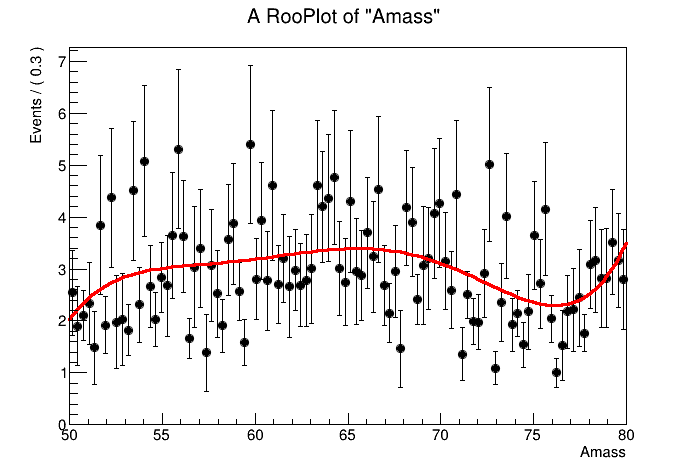

In [52]:
# fit background
f = R.TFile("MHc-70_MA-65/Background.root")
tree = f.Get("Events")

# Define mass and weight variables
mass = R.RooRealVar("Amass", "Amass", 65, 50, 80)
weight = R.RooRealVar("weight", "weight", 0, -1., 1.)

# Convert to RooDataSet
mc = R.RooDataSet("Amass", "Amass", tree, R.RooArgSet(mass, weight), "", "weight") 

# Define a background model
# Bernstein polynomial
a0 = R.RooRealVar("a0", "a0", 1, -10, 10)
a1 = R.RooRealVar("a1", "a1", 1, -10, 10)
a2 = R.RooRealVar("a2", "a2", 1, -10, 10)
a3 = R.RooRealVar("a3", "a3", 1, -10, 10)
a4 = R.RooRealVar("a4", "a4", 1. -10, 10)
a5 = R.RooRealVar("a5", "a5", 1, -10, 10)
model = R.RooBernstein("bkg", "bkg", mass, R.RooArgList(a0, a1, a2, a3, a4, a5))
result = model.fitTo(mc, RF.SumW2Error(True), RF.Save(True), RF.PrintLevel(-1))


ndof = mc.numEntries() - result.floatParsFinal().getSize()

can = R.TCanvas()
plot = mass.frame()
mc.plotOn(plot)
model.plotOn(plot, R.RooFit.LineColor(2))
chi2 = plot.chiSquare(ndof)
plot.Draw()
can.Update()
can.Draw()

print(chi2)

-0.002690163426618809
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Amass) TTree Float_t branch Amass will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #0 because Amass cannot accommodate the value 89.9639
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #1 because weight cannot accommodate the value 1.41132
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #2 because weight cannot accommodate the value 1.39586
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #3 because weight cannot accommodate the value 2.82985
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(Amass) Ignored 192565 out-of-range events
[#1] INFO:NumericIntegrati

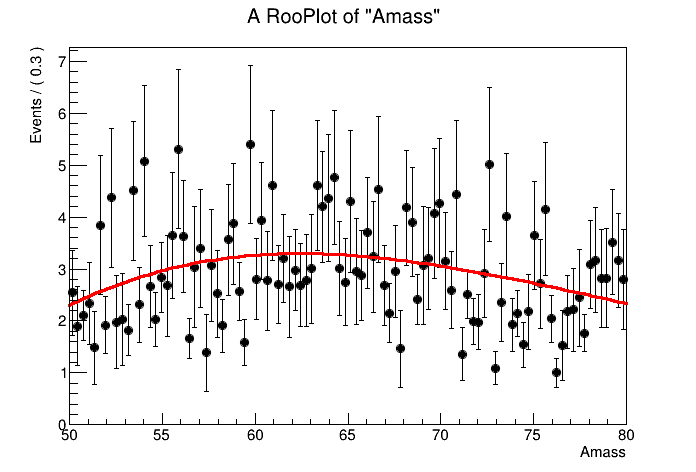

In [53]:
# fit background
f = R.TFile("MHc-70_MA-65/Background.root")
tree = f.Get("Events")

# Define mass and weight variables
mass = R.RooRealVar("Amass", "Amass", 65, 50, 80)
weight = R.RooRealVar("weight", "weight", 0, -1., 1.)

# Convert to RooDataSet
mc = R.RooDataSet("Amass", "Amass", tree, R.RooArgSet(mass, weight), "", "weight") 

# Define a background model
# simple polynomial
a0 = R.RooRealVar("a0", "a0", 1, -10, 10)
a1 = R.RooRealVar("a1", "a1", 1, -10, 10)
a2 = R.RooRealVar("a2", "a2", 1, -10, 10)
a3 = R.RooRealVar("a3", "a3", 1, -10, 10)
a4 = R.RooRealVar("a4", "a4", 1. -10, 10)
poly = R.RooPolynomial("poly", "poly", mass, R.RooArgList(a0, a1, a2, a3, a4))

lamb = R.RooRealVar("lambda", "lambda", -0.1, -3, 3)
exp = R.RooExponential("exp", "exp", mass, lamb)
model = R.RooProdPdf("background", "background", poly, exp)
result = model.fitTo(mc, RF.SumW2Error(True), RF.Save(True), RF.PrintLevel(-1))

ndof = mc.numEntries() - result.floatParsFinal().getSize()

can = R.TCanvas()
plot = mass.frame()
mc.plotOn(plot)
model.plotOn(plot, R.RooFit.LineColor(2))
chi2 = plot.chiSquare(ndof)
plot.Draw()
can.Update()
can.Draw()

print(chi2)

-0.0022667322782776497
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Amass) TTree Float_t branch Amass will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #0 because Amass cannot accommodate the value 89.9639
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #1 because weight cannot accommodate the value 1.41132
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #2 because weight cannot accommodate the value 1.39586
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping event #3 because weight cannot accommodate the value 2.82985
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Amass) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(Amass) Ignored 192565 out-of-range events
[#1] INFO:NumericIntegrat

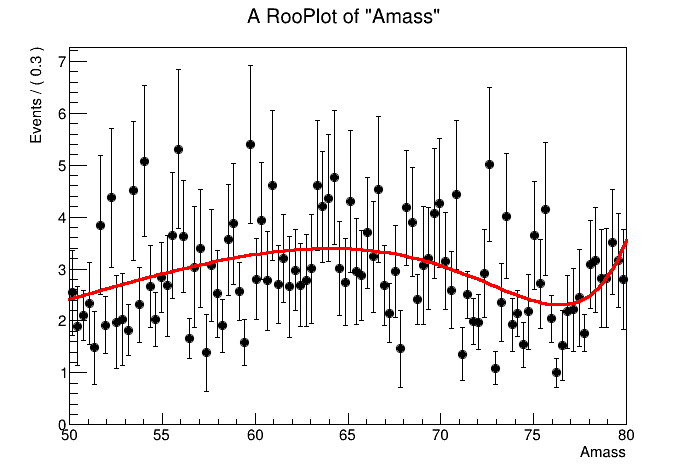

In [54]:
# fit background
f = R.TFile("MHc-70_MA-65/Background.root")
tree = f.Get("Events")

# Define mass and weight variables
mass = R.RooRealVar("Amass", "Amass", 65, 50, 80)
weight = R.RooRealVar("weight", "weight", 0, -1., 1.)

# Convert to RooDataSet
mc = R.RooDataSet("Amass", "Amass", tree, R.RooArgSet(mass, weight), "", "weight") 

# Define a background model
# simple polynomial
a0 = R.RooRealVar("a0", "a0", 1, -10, 10)
a1 = R.RooRealVar("a1", "a1", 1, -10, 10)
a2 = R.RooRealVar("a2", "a2", 1, -10, 10)
a3 = R.RooRealVar("a3", "a3", 1, -10, 10)
a4 = R.RooRealVar("a4", "a4", 1. -10, 10)
poly = R.RooBernstein("poly", "poly", mass, R.RooArgList(a0, a1, a2, a3, a4))

lamb = R.RooRealVar("lambda", "lambda", -0.1, -3, 3)
exp = R.RooExponential("exp", "exp", mass, lamb)
model = R.RooProdPdf("background", "background", poly, exp)
result = model.fitTo(mc, RF.SumW2Error(True), RF.Strategy(2), RF.Save(True), RF.PrintLevel(-1))


ndof = mc.numEntries() - result.floatParsFinal().getSize()

can = R.TCanvas()
plot = mass.frame()
mc.plotOn(plot)
model.plotOn(plot, R.RooFit.LineColor(2))
chi2 = plot.chiSquare(ndof)
plot.Draw()
can.Update()
can.Draw()

print(chi2)